In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import glob
from natsort import natsorted

In [87]:
Nx = 1000
x1 = -10.0
x2 = 10
X  = np.linspace(x1,x2,num=Nx, dtype=np.float32)

In [88]:
loss_real = np.loadtxt('./GL_NN/output_real.dat',unpack = True)
loss_img = np.loadtxt('./GL_NN/output_img.dat',unpack = True)

Text(0, 0.5, 'Loss')

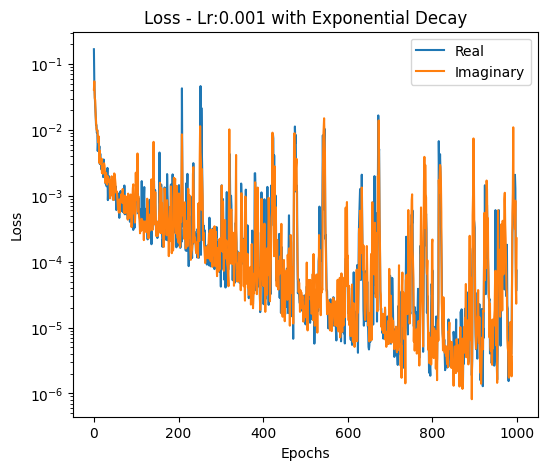

In [89]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)

ax.set_yscale('log')

# Surface Plot

ax.plot(loss_real[0],loss_real[1])
ax.plot(loss_img[0],loss_img[1])

ax.legend(['Real', 'Imaginary'])

# Labels
plt.title("Loss - Lr:0.001 with Exponential Decay")
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')

In [103]:
u = np.load("./GL_NN/U4",allow_pickle=True)
v = np.load("./GL_NN/V",allow_pickle=True)

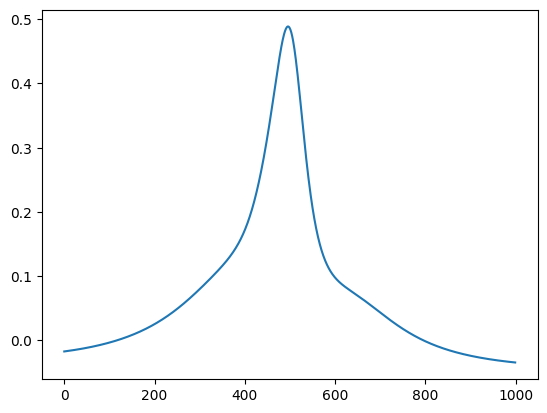

In [104]:
plt.plot(u)

In [111]:
u_list = natsorted(glob.glob('./GL_NN/U*'))
v_list = natsorted(glob.glob('./GL_NN/V*'))

x_list = natsorted(glob.glob('./GL_NN/X*'))

In [112]:
u_list

['./GL_NN/U',
 './GL_NN/U1',
 './GL_NN/U2',
 './GL_NN/U3',
 './GL_NN/U4',
 './GL_NN/U5',
 './GL_NN/U6',
 './GL_NN/U7',
 './GL_NN/U8']

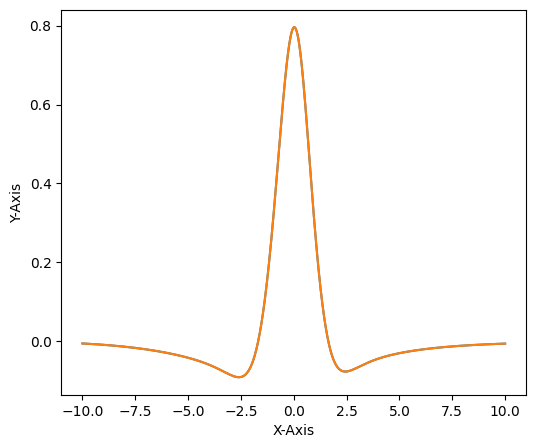

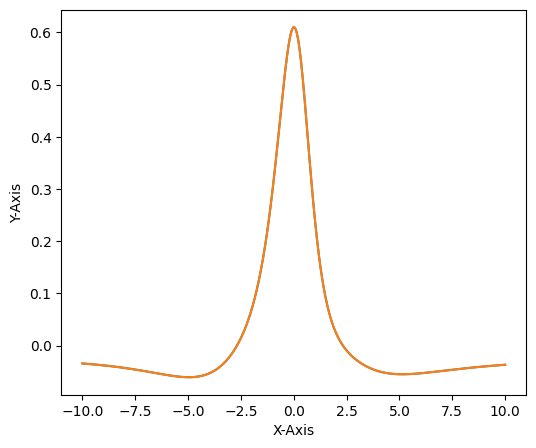

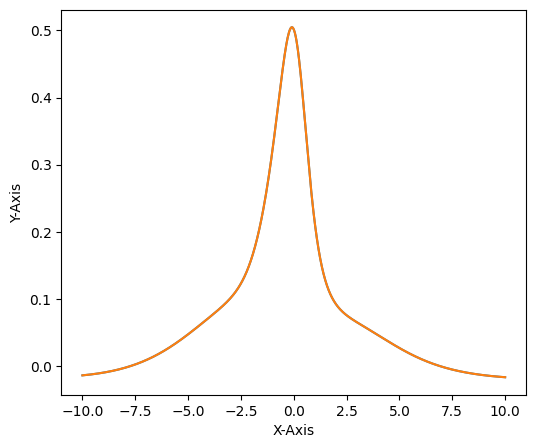

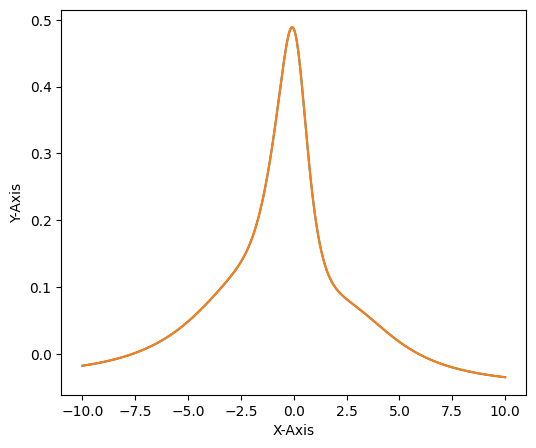

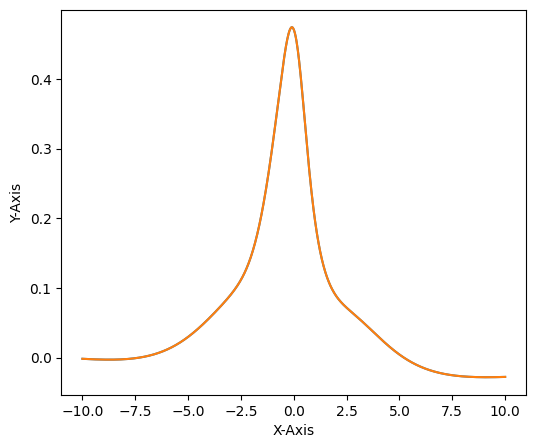

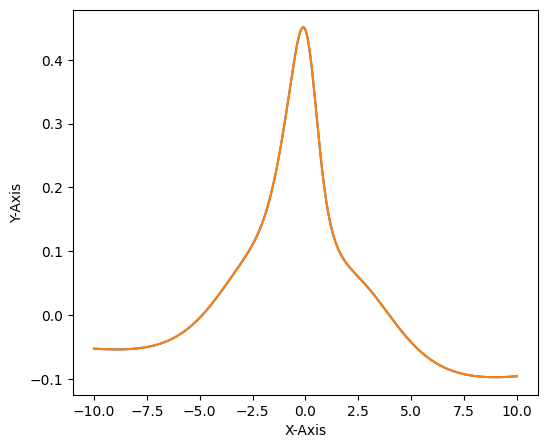

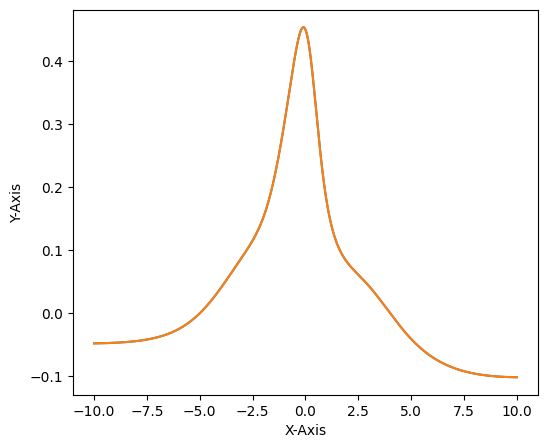

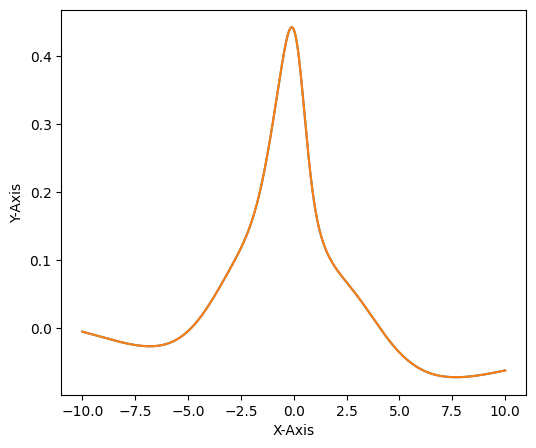

In [115]:
for i in range(1,len(u_list)):    
    x = np.load(x_list[i],allow_pickle=True)
    u = np.load(u_list[i],allow_pickle=True)
    v = np.load(v_list[i],allow_pickle=True)
    
    fig = plt.figure(figsize=(6,5))
    ax = fig.add_subplot(111)

    # Surface Plot

    ax.plot(x, u)
    ax.plot(x, v)

    # Labels

    ax.set_xlabel('X-Axis')
    ax.set_ylabel('Y-Axis')
    
    # Save
    #plt.savefig(f'omega_plot_{i}.png')
    #plt.cla()